In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from scipy import stats
from google.colab import files

# ICA

## PAGOS


In [ ]:
r

In [ ]:
ica_payment.head()

,nit_cedula,factura,valor_factura,nombre_pago,ultimo_pago,year,unnamed_column
0,900876121.0,2.016001e+10,1533.0,PRADERAS Y JARDINES,1/12/2015,2016,NaN
1,900756729.0,2.016010e+09,661.0,SERVITRAMITES DE ORIENTE S.A.S,1/12/2015,2016,NaN
2,15423584.0,2.016003e+09,3450.0,EST. DE DULCES,1/12/2015,2016,NaN
3,805004034.0,2.016010e+09,139674.0,COOPSERP,1/11/2015,2016,NaN
4,860002964.0,2.016009e+09,3231155.0,BANCO DE BOGOTA,1/12/2015,2016,NaN


In [ ]:
#Giving format of date and extracting month and year for crosstab
ica_payment["ultimo_pago"]=pd.to_datetime(ica_payment["ultimo_pago"],format='%d/%m/%Y')
ica_payment["mes_ultimo_pago"]=ica_payment["ultimo_pago"].dt.month
ica_payment["ano_ultimo_pago"]=ica_payment["ultimo_pago"].dt.year

In [ ]:
#Returning to initial format
ica_payment["ultimo_pago"]=ica_payment["ultimo_pago"].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
%matplotlib inline

In [ ]:
ica_payment["log_valor_factura"]=np.log(ica_payment["valor_factura"])
ica_payment_hist=ica_payment[np.isfinite(ica_payment["log_valor_factura"])]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


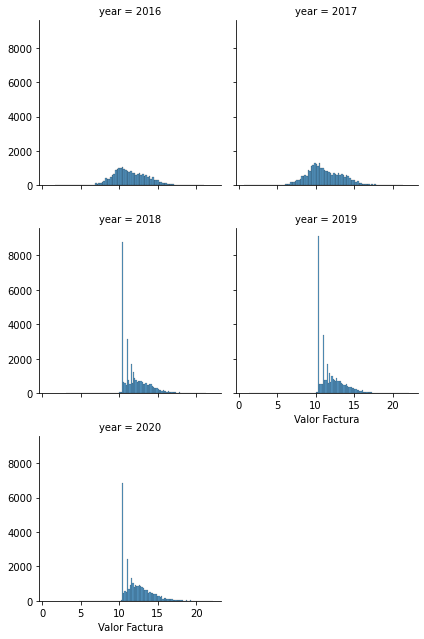

In [ ]:

g = sns.FacetGrid(ica_payment_hist, col="year",col_wrap=2)
g.map(sns.histplot, "log_valor_factura")
g.set_axis_labels(x_var="Valor Factura")

In [ ]:
#This is to extract an example using same cedula
ica_payment[ica_payment["nit_cedula"]==ica_payment["nit_cedula"].unique()[0]].sort_values("ultimo_pago")

In [ ]:
#All years have payments on all months
pd.crosstab(ica_payment["ano_ultimo_pago"],ica_payment["mes_ultimo_pago"])

mes_ultimo_pago,1,2,3,4,5,6,7,8,9,10,11,12
ano_ultimo_pago,,,,,,,,,,,,
1998,0,0,0,1,0,0,0,0,0,0,0,0
2000,5,0,0,0,0,0,0,0,0,0,0,0
2001,0,1,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,1,1,0,0,0,0,1,1,0
2003,0,0,0,0,0,1,0,0,1,0,0,0
2004,0,0,0,0,0,0,0,0,0,0,0,1
2005,0,0,0,1,0,0,1,0,0,0,0,0
2006,0,0,1,0,0,0,0,0,0,1,0,0
2007,2,0,0,1,1,2,1,1,1,0,3,8


In [ ]:
#for cycle to shift the date. Takes long time to run.

#shifted_ica_payment=pd.DataFrame()

#for cedula in ica_payment["nit_cedula"].unique():
#  sub_df=ica_payment[ica_payment["nit_cedula"]==cedula].sort_values("ultimo_pago")
#  sub_df["fecha_pago_actual"]=sub_df["ultimo_pago"].shift(-1)
#  shifted_ica_payment=pd.concat([shifted_ica_payment,sub_df])



In [ ]:
#Saving file
shifted_ica_payment.to_csv("total_ica_payment_v2.csv")
files.download("total_ica_payment_v2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
shifted_ica_payment=pd.read_csv("/content/drive/MyDrive/Data/clean_ica_payment_v2_(correct_date).csv")

In [ ]:
time_series=shifted_ica_payment[["valor_factura","fecha_pago_actual"]]
time_series["fecha_pago_actual"]=pd.to_datetime(time_series["fecha_pago_actual"],format="%Y-%m")
time_series=time_series[(time_series["fecha_pago_actual"].dt.year>=2016) & (time_series["fecha_pago_actual"].dt.year<=2020)]
time_series["valor_factura"]=time_series["valor_factura"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
time_series_ica=time_series.groupby("fecha_pago_actual").sum()
time_series_ica.head()

,valor_factura
fecha_pago_actual,
2016-01-01,2.797808e+09
2016-02-01,2.634532e+09
2016-03-01,3.262727e+09
2016-04-01,4.149151e+09
2016-05-01,4.084250e+09


In [ ]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format. Will be clear in Screenshot

fig, axes = plt.subplots(figsize=(15,7))
sns.lineplot(x="fecha_pago_actual",y="valor_factura",data=time_series_ica)
axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)
axes.set(xlabel="Current payment date",ylabel="Payment amount")

plt.xticks(rotation = 'vertical')
plt.show()

#There are regular peaks in december of each year, for the last two years, altough peaks are uneven.
#Time series seems stationary on mean and variance. This can be researched further with a unit root test.

In [ ]:
time_series_ica.to_csv("time_series_ica.csv")

In [ ]:
from rpy2.robjects.packages import importr
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages("urca")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/urca_1.3-0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 682935 bytes (666 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

In [ ]:
%%R
 
library(urca)
time_series_ica=read.csv("time_series_ica.csv")
summary(ur.df(time_series_ica$valor_factura,type="drift",lag=1))#Try with different lags and leave only the significant ones.
#Ya que el estadístico de prueba es -5.352, y está a la derecha de los valores críticos (tau3), se rechaza la hipótesis nula de raiz unitaria
# y por tanto se tiene que la serie es estacionaria en media. No obstante, se sospecha estacionalidad en la serie y por tanto, se quiere emplear otra prueba
#de raíz unitaria.


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.506e+09 -1.155e+09 -4.443e+08  2.526e+08  1.757e+10 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.138e+09  1.076e+09   3.845  0.00032 ***
z.lag.1     -1.097e+00  2.049e-01  -5.352 1.82e-06 ***
tt           1.211e+07  2.363e+07   0.513  0.61036    
z.diff.lag   2.572e-02  1.394e-01   0.184  0.85432    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.957e+09 on 54 degrees of freedom
Multiple R-squared:  0.5249,	Adjusted R-squared:  0.4985 
F-statistic: 19.88 on 3 and 54 DF,  p-value: 8.229e-09


Value of test-statistic is: -5.352 9.6424 14.4581 

Critical values for test statistics: 
      1pct  5pct 10p

In [ ]:
#No variance transformation seems necessary altough lambda parameter can be investigated.

stats.boxcox(time_series_ica['valor_factura'])[1]

0.4002212948262593

## FACTURA

In [ ]:
ica_declaration=pd.read_csv("/content/drive/MyDrive/Data/clean_ica_declaration.csv",engine="python")

In [ ]:
ica_declaration.info()
 
#No es posible mensualizar porque no contiene información sobre último pago.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35045 entries, 0 to 35044
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nit_cedula               35045 non-null  int64  
 1   clase                    35045 non-null  object 
 2   naturaleza               35045 non-null  object 
 3   nombre_declaracion       35045 non-null  object 
 4   base_gravable            35045 non-null  object 
 5   tarifa                   35045 non-null  float64
 6   valor_impuesto           35045 non-null  object 
 7   valor_concepto           25285 non-null  object 
 8   id_declara_ano_gravable  35045 non-null  int64  
 9   ciuu_section             35045 non-null  object 
 10  year                     35045 non-null  int64  
 11  concepto                 25283 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 3.2+ MB


# PREDIAL

In [ ]:
predial_payment=pd.read_csv("/content/drive/MyDrive/Data/clean_predial_payment.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
predial_payment.head()

,id_factura,valor_factura,nit_cedula,nombre_pago,codigo_catrastral,proindiviso,fecha_ultimo_pago,valor_conceptos,year,unnamed_col
0,2016001,930.783,15438574,CARDONA ECHEVERRI FERNEY,1.010100e+21,100.00,201501.0,0,2016,NaN
1,2016001,930.783,15438574,CARDONA ECHEVERRI FERNEY,1.010310e+21,5.26,201502.0,0,2016,NaN
2,2016001,930.783,15438574,CARDONA ECHEVERRI FERNEY,1.010310e+21,100.00,201502.0,0,2016,NaN
3,201600171,154.565,15445559,AVILA GAVIRIA MARIO ALEJANDRO,1.010100e+21,100.00,201504.0,0,2016,NaN
4,201600358,65.523.249,890981947,CORPORACION CLUB CAMPESTRE,2.020000e+21,100.00,201504.0,0,2016,NaN


In [ ]:
predial_payment["fecha_ultimo_pago"]=pd.to_datetime(predial_payment["fecha_ultimo_pago"],format='%Y%m')
predial_payment["mes_ultimo_pago"]=predial_payment["fecha_ultimo_pago"].dt.month
predial_payment["ano_ultimo_pago"]=predial_payment["fecha_ultimo_pago"].dt.year

In [ ]:
#Property tax is only paid in some months of the year.

pd.crosstab(predial_payment["ano_ultimo_pago"],predial_payment["mes_ultimo_pago"])

mes_ultimo_pago,1.0,2.0,3.0,4.0,12.0
ano_ultimo_pago,,,,,
1991.0,0,0,0,31,0
1992.0,2,0,0,3,0
1993.0,0,3,1,3,0
1994.0,8,3,1,5,0
1995.0,1,1,2,6,0
1996.0,3,2,2,14,0
1997.0,5,4,5,23,0
1998.0,7,6,7,23,0
1999.0,10,9,8,27,0


In [ ]:
shifted_predial_payment=pd.read_csv("/content/drive/MyDrive/Data/clean_predial_payment_v3_(correct_date).csv",sep=";")

In [ ]:
shifted_predial_payment["fecha_pago_actual_trimestral"]=pd.to_datetime(shifted_predial_payment["fecha_pago_actual_trimestral"],format="%Y%m").dt.to_period("Q")

In [ ]:
time_series_predial=shifted_predial_payment[["valor_factura","fecha_pago_actual_trimestral"]]
#time_series_predial["fecha_pago_actual_trimestral"]=pd.to_datetime(time_series_predial["fecha_pago_actual_trimestral"],format="%Y%m")
time_series_predial=time_series_predial[(time_series_predial["fecha_pago_actual_trimestral"].dt.year>=2016) & (time_series_predial["fecha_pago_actual_trimestral"].dt.year<=2020)]
time_series_predial["valor_factura"]=time_series_predial["valor_factura"].fillna(0)

In [ ]:
time_series_predial["fecha_pago_tri_str"]=time_series_predial['fecha_pago_actual_trimestral'].astype('string')

In [ ]:
time_series_precial_grouped=time_series_predial.groupby("fecha_pago_tri_str").sum()

In [ ]:
time_series_precial_grouped.valor_factura=time_series_precial_grouped.valor_factura/1000000
time_series_precial_grouped.head()

,valor_factura
fecha_pago_tri_str,
2016Q1,23769.485989
2016Q2,44423.648131
2016Q3,44333.463020
2016Q4,193289.465509
2017Q1,18627.026953


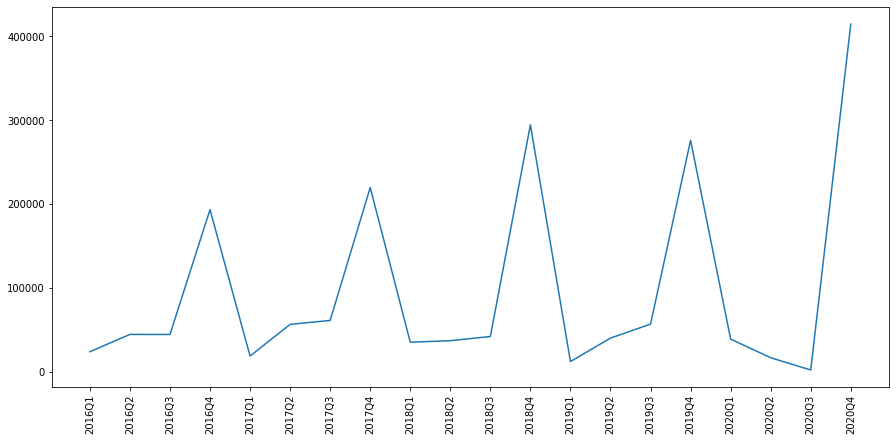

In [ ]:
fig, axes = plt.subplots(figsize=(15,7))
plt.plot(time_series_precial_grouped.index, time_series_precial_grouped["valor_factura"])

plt.xticks(rotation = 'vertical')
axes.ticklabel_format(useOffset=False, style='plain',axis="y")
plt.show()

ValueError: ignored

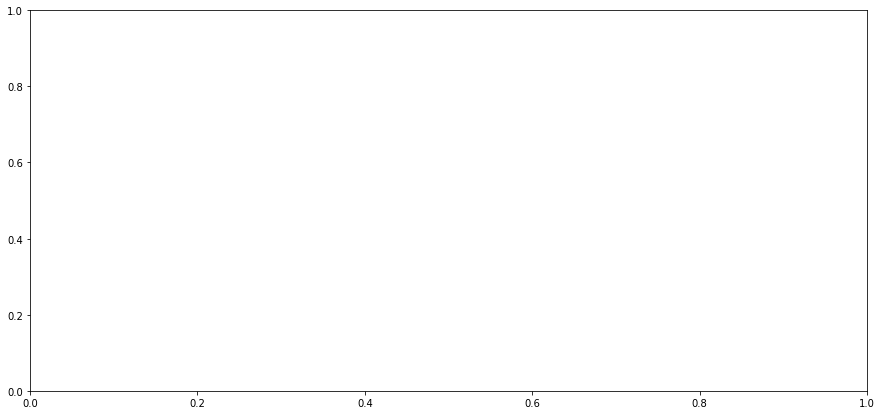

In [ ]:
%matplotlib inline

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator((1,4,7,10))  # every month
years_fmt = mdates.DateFormatter('%Y') #This is a format. Will be clear in Screenshot

fig, axes = plt.subplots(figsize=(15,7))
sns.lineplot(x="fecha_pago_actual_trimestral",y="valor_factura",data=time_series_precial_grouped)
axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)
axes.set(xlabel="Current payment date",ylabel="Payment amount")

plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
predial_test=shifted_predial_payment[["fecha_ultimo_pago","valor_factura"]]
predial_test["fecha_ultimo_pago"]=pd.to_datetime(predial_test["fecha_ultimo_pago"],format="%Y%m")

predial_test=predial_test[(predial_test["fecha_ultimo_pago"].dt.year>=2016) & (predial_test["fecha_ultimo_pago"].dt.year<=2020)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
predial_test=predial_test.groupby("fecha_ultimo_pago").sum()

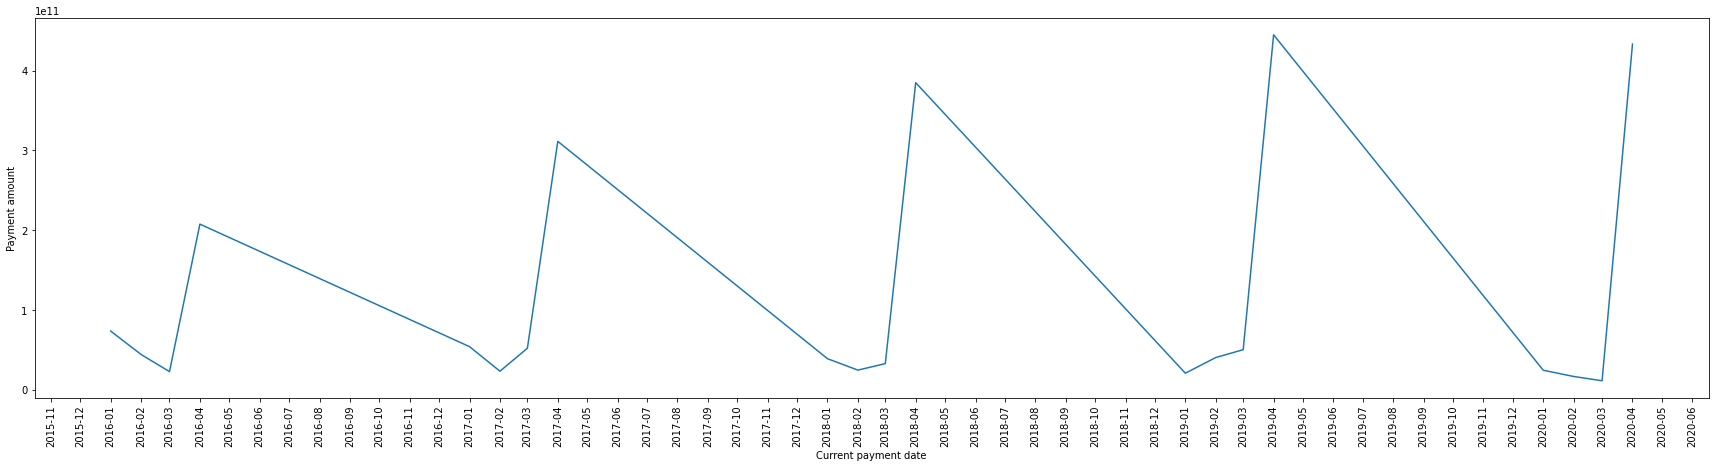

In [ ]:
%matplotlib inline

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format. Will be clear in Screenshot

fig, axes = plt.subplots(figsize=(30,7))
sns.lineplot(x="fecha_ultimo_pago",y="valor_factura",data=predial_test)
axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)
axes.set(xlabel="Current payment date",ylabel="Payment amount")

plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
time_series_precial_grouped.to_csv("time_series_predial.csv")

In [ ]:
from rpy2.robjects.packages import importr
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages("urca")

In [ ]:
%%R

library(urca)
time_series_predial=read.csv("time_series_predial.csv")
summary(ur.df(time_series_predial$valor_factura,type="trend",lag=1))